### Forecast the sales for 1 year for the furniture products category on the basis of the historical data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the Data
df = pd.read_excel("Sample - Superstore.xls", header=0)

In [3]:
#Printing Head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [6]:
furniture = df[df["Category"] == "Furniture"]
furniture.shape

(2121, 21)

In [7]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
# If it is in object, not in date time format
# furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

In [9]:
furniture["Order Date"].min(), furniture["Order Date"].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

## Pre-Processing Steps for Time Series Modelling

In [10]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [11]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


## Sort the values

In [12]:
furniture = furniture.sort_values('Order Date', ascending =True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [13]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [14]:
# After seeing the date, we can say that it has missing dates.

In [15]:
furniture["Order Date"].value_counts()

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

#### if the first value does not show 1, it indicates that **grouping** is required

In [16]:
furniture = furniture.groupby('Order Date')["Sales"].sum().reset_index()           # reset_index -> is used to reset the index value
furniture.shape

(889, 2)

In [17]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [18]:
# Convert the date variable to index --> for Single Dimensional Array
furniture = furniture.set_index('Order Date')

In [19]:
print(furniture.shape)
furniture.head(10)

(889, 1)


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


Since we have alot of missing values by looking at the shape which is 889 (Should be 365 days X 4 years = 1460 days) we will have to resample it

In [20]:
# Out of 365, lots of value are missing --> Will do Resampling --> always works on index_col
y = furniture['Sales'].resample("M").mean() # --> Convert Daily basis data to Weekly basis data          mean --> using for avg of weekly basis, but we are considering daily basis only.

In [21]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

In [22]:
# Weekly basis, we are getting 208 value. which are equally time interval

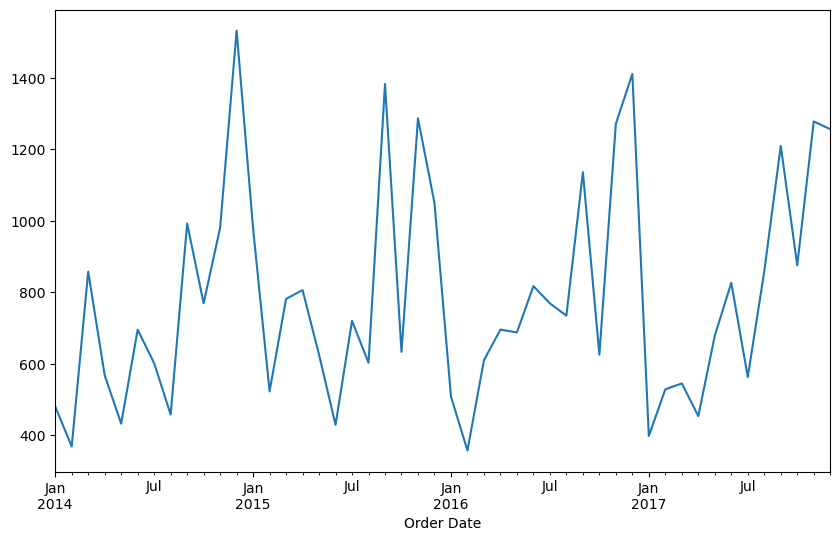

In [23]:
# Plotting the Graph -> Line Plot
y.plot(figsize=(10,6))
plt.show()

In [24]:
# Plotting on the monthly basis, 14 to 16 --> for training part and 2017 --> for testing part

In [25]:
# Splitting into Training and Testing
train=y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [26]:
test=y.loc['2017-01-31':]
print(test.shape)
train

(12,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

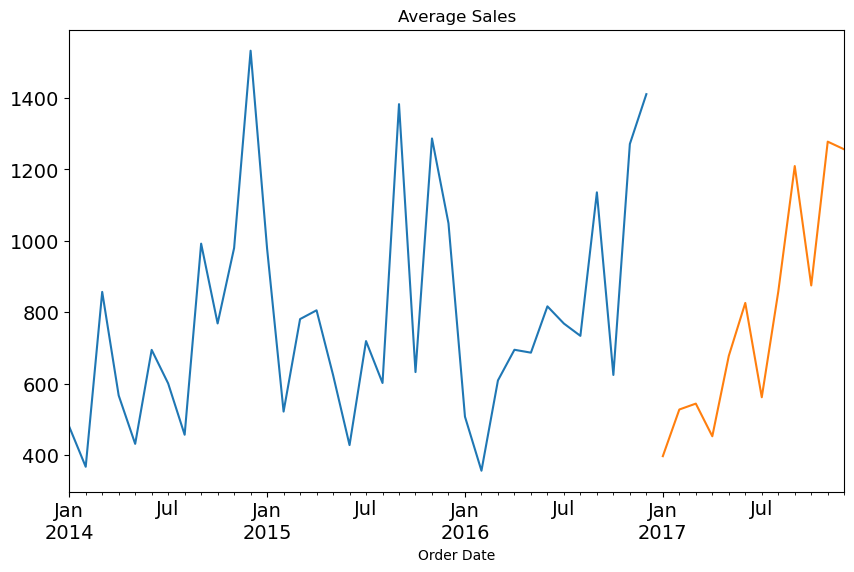

In [27]:
# Plotting the data [Traning and Testing]
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

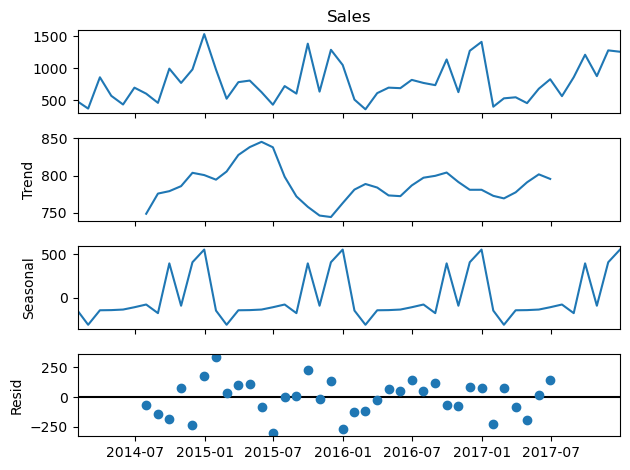

In [28]:
# Allows to check Seasonality and Trend
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y) # Pass the entire data to it
decomposition.plot()
plt.show()

Trend Graph shows there is no trend in data.

Seasonal Graph shows there is a seasonality in data, pattern is repeating over a period of time.

C:\Users\Yesh Damania\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


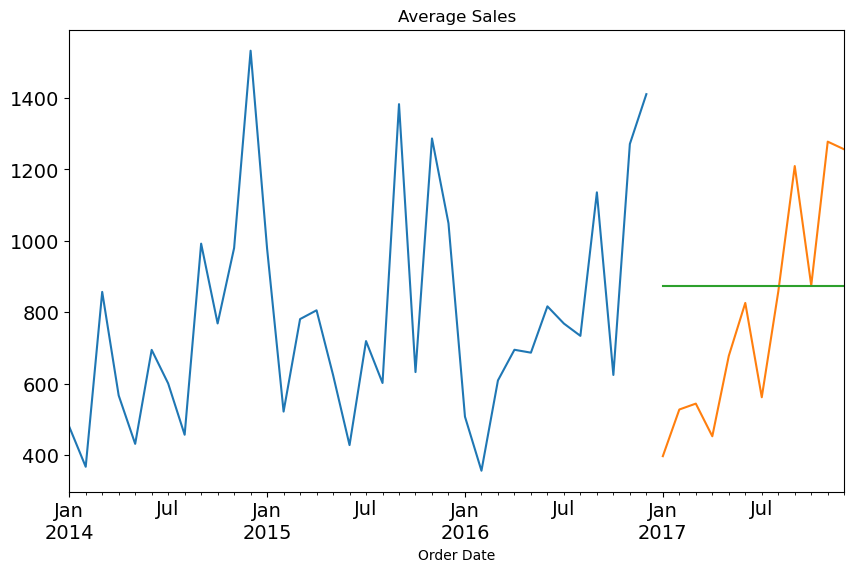

In [29]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy() # creating copy of test data
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)  # Building the model and passing the training data          
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))                     # forecast function --> 2014, 15, 16 data have --> forecast for 2017    Forecast value --> goes to SES variable 
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [30]:
Exp_Smooth.SES    # SES is Ypred

2017-01-31    873.671829
2017-02-28    873.671829
2017-03-31    873.671829
2017-04-30    873.671829
2017-05-31    873.671829
2017-06-30    873.671829
2017-07-31    873.671829
2017-08-31    873.671829
2017-09-30    873.671829
2017-10-31    873.671829
2017-11-30    873.671829
2017-12-31    873.671829
Freq: M, dtype: float64

# Evaluation

In [31]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

418.97075611710727

In [32]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

315.0328571018992


C:\Users\Yesh Damania\AppData\Local\Temp\ipykernel_18636\3783036012.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.35)   # alpha -> 0.1 , BETA-> 0.35
C:\Users\Yesh Damania\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


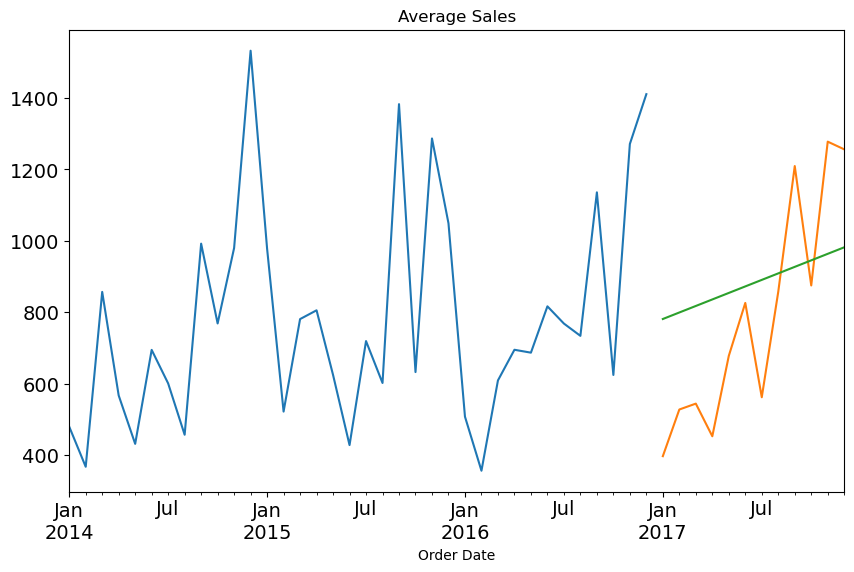

In [33]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.35)   # alpha -> 0.1 , BETA-> 0.35
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


As we can observed that from starting months its increasing 

In [34]:
fit1.aic

448.98253330377497

In [35]:
Holt_df["Holt_linear"]

2017-01-31    781.464457
2017-02-28    799.707305
2017-03-31    817.950153
2017-04-30    836.193001
2017-05-31    854.435849
2017-06-30    872.678697
2017-07-31    890.921546
2017-08-31    909.164394
2017-09-30    927.407242
2017-10-31    945.650090
2017-11-30    963.892938
2017-12-31    982.135786
Freq: M, dtype: float64

In [36]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Holt_df["Holt_linear"]))
print(rmse)

265.2413902624746


In [37]:
# This is Trail and Error Approach for finding the best combination of alpha and beta.      AIC Value (lowest aic)

In [38]:
"""
 
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic
 
"""

"\n \nimport numpy as np\nmy_dict={}\nfor i in np.arange(0.01,1,0.01):\n    for j in np.arange(0.01,1,0.01):\n        #from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        #Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        #print(fit1.aic,i,j)\n        my_dict[i,j] = fit1.aic\n \n"

In [39]:
# It will check the value of k, find the minimum value of k (aic)
"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
"""

'\nfor k in my_dict:\n    if my_dict[k]==min(my_dict.values()):\n        print(k,":",my_dict[k])\n'

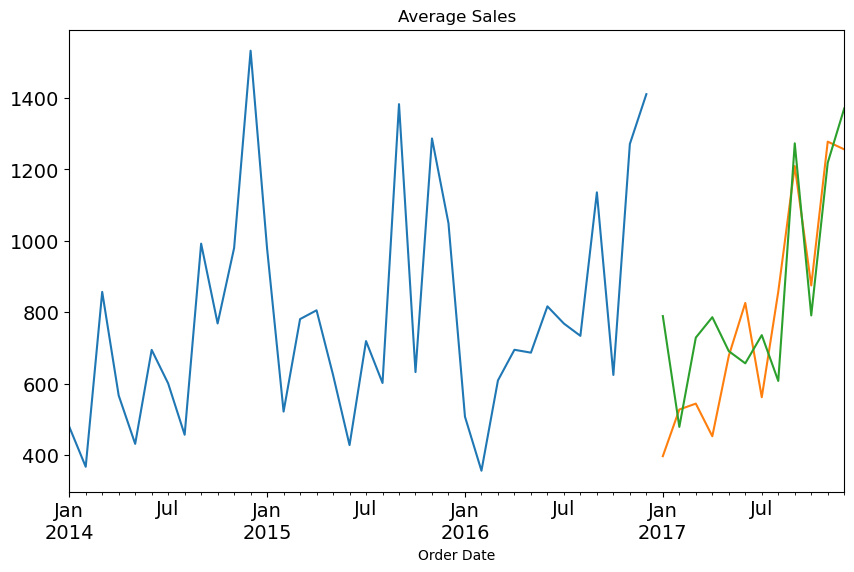

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()    
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [41]:
fit1.aic

392.39062467774284

In [42]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rmse)

193.7115288576619


In [43]:
Holt_Winter_df['Holt_Winter']

2017-01-31     789.680007
2017-02-28     479.584746
2017-03-31     729.439091
2017-04-30     786.559948
2017-05-31     691.434914
2017-06-30     657.425817
2017-07-31     736.375200
2017-08-31     608.142532
2017-09-30    1273.170681
2017-10-31     791.498424
2017-11-30    1218.795006
2017-12-31    1370.720631
Freq: M, dtype: float64

Across various model, Holt Winter Model is the best model because its giving the Lowest RMSE Value (193.911). 

We can observed that there is a increase in sales in september, November and December 

# Forecasting

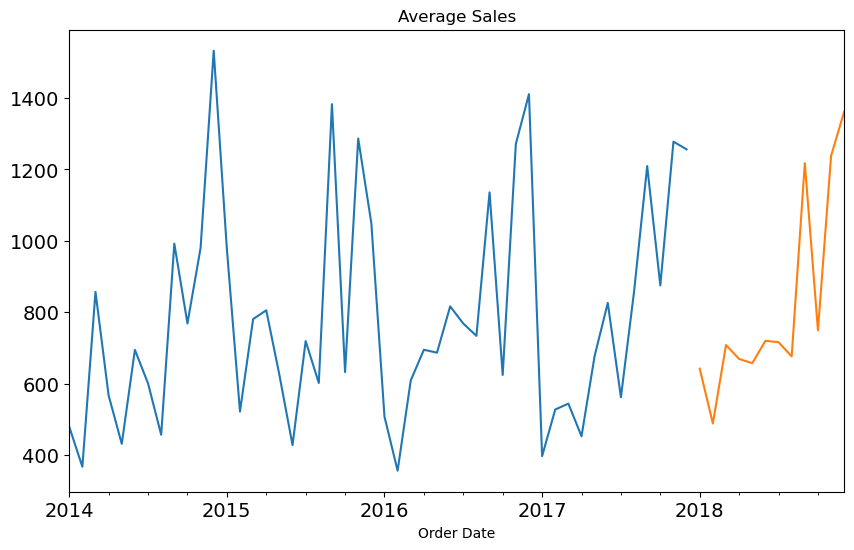

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()

Y_predictions = fit1.forecast(steps=12)   # for 2 YRS -> steps=24 -> It will Forecast for 2 yrs based on Recent Values
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [45]:
Y_predictions   # Values for 2018 predicted 

2018-01-31     642.509142
2018-02-28     489.020473
2018-03-31     708.664188
2018-04-30     669.580552
2018-05-31     657.849918
2018-06-30     720.429586
2018-07-31     716.577242
2018-08-31     676.801181
2018-09-30    1217.639501
2018-10-31     749.627560
2018-11-30    1238.016550
2018-12-31    1362.099962
Freq: M, dtype: float64

In [46]:
Y_predictions.to_excel("Time Series Output.xlsx", header=["Sales"], index=True)

In [47]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [48]:
#!pip install pmdarima --user

In [49]:
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# Identification --> 
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,      # Start, max p and q,--> range 0 to 3,   m-> seasonal period=12-> manual value, seasonal=True-> values taken for consideration. information_criteria-->gives 'aic value', d->None-> We dont know data is stationary or not 
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

In [ ]:
model.aic()

In [ ]:
# Build model SARIMAX with above best paramter

# SARIMAX using train is the estimation 
# SARIMAX using y is the Forecasting 

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,                                         # Based on Training Data     TO SEE FORECAST VALUE -> use y
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit() # Passing best value

In [ ]:
# Validation
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)     # Predictions of obs
 
plt.figure(figsize=(10,6))
y.plot(label='observed')    # To see Act vs Pred
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [ ]:
pred.predicted_mean

In [ ]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]
 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

In [ ]:
pred.predicted_mean.to_excel('TimeSeriesOutput_ARIMA.xlsx',header='Sales',index=True)